 # Diplomatura en Ciencas de Datos, Aprendizaje Automático y sus Aplicaciones

 Autores: Matias Oria, Antonela Sambuceti, Pamela Pairo, Benjamín Ocampo

 # Diplomatura en Ciencas de Datos, Aprendizaje Automático y sus Aplicaciones

 Autores: Matias Oria, Antonela Sambuceti, Pamela Pairo, Benjamín Ocampo

 # Diplomatura en Ciencas de Datos, Aprendizaje Automático y sus Aplicaciones

 Autores: Matias Oria, Antonela Sambuceti, Pamela Pairo, Benjamín Ocampo

 ## Analisis descriptivo
 Para la respuesta a la pregunta **¿Cuáles son los lenguajes de programación
 asociados a los mejores salarios?** hay varios factores a tener en cuenta
 además del salario neto de los empleados, tales como, el tipo de contrato
 (Full Time o Part Time), si su sueldo está dolarizado o no, los años de
 experiencia, su rol de trabajo, entre otras que pueden dificultar el analisis
 de la pregunta si no nos enfocamos en una subpoblación del total de
 trabajadores. Por lo tanto, para hacer una comparación más justa optamos por
 considerar aquellos empleados que cumplan lo siguiente:

 - Contrato Full Time: Dependiendo de la cantidad de horas que se empeñe en el
   rol el salario podría verse influenciado. Por ende consideramos solamente el
   de mayor carga horaria.
 - A lo sumo 5 años de experiencia: Nos interesará saber que lenguajes otorgan
   los mejores salarios en los primeros años de trabajo.
 - Un salario neto mayor al minimo vital y móvil en la Argentina: Filtraremos
   además aquellos empleados que no superen el salario mínimo para empleados
   mensualizados.

 Esto llevó a la selección de las siguientes variables aleatorias relevantes
 `rvs`.

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from utils import *

# Random variables defined in utils.py
rvs = [
    work_contract_type,
    profile_years_experience,
    salary_in_usd,
    salary_monthly_NETO,
    tools_programming_language
]

assert all(rv in DB.columns.values.tolist() for rv in rvs)

df = DB[
    (DB.work_contract_type == "Full-Time") &
    (DB.salary_monthly_NETO > MINWAGE_IN_ARG) &
    (DB.profile_years_experience <= 5) &
    (DB.salary_in_usd != "Mi sueldo está dolarizado")   # TODO: this column should be cleaned before
][rvs]


 También agregaremos una columna adicional `cured_programming_language`
 utilizando la función `add_cured_col` donde a cada uno de los lenguajes de
 programación dados por la columna `tools_programming_language`, se los separa
 en listas de python. Luego apilamos sobre cada empleado sus lenguajes de
 programación utilizados dados por la columna curada utilizando la función
 `stack_col` para obtener el siguiente dataframe.

In [2]:

cured_programming_languages = "cured_programming_languages"
programming_language = "programming_language"


df = add_cured_col(
    df=df,
    cured_col=cured_programming_languages,
    uncured_col=tools_programming_language,
    cure_func=split_languages
)

df = stack_col(
    df=df,
    stacked_col=programming_language,
    unstacked_col=cured_programming_languages
)

df = df.reset_index(drop=True)

df


,programming_language,work_contract_type,profile_years_experience,salary_in_usd,salary_monthly_NETO,tools_programming_languages,cured_programming_languages
0,html,Full-Time,5.0,NaN,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
1,javascript,Full-Time,5.0,NaN,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
2,python,Full-Time,5.0,NaN,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
3,java,Full-Time,1.0,NaN,44000.0,"Java, Javascript","[java, javascript]"
4,javascript,Full-Time,1.0,NaN,44000.0,"Java, Javascript","[java, javascript]"
...,...,...,...,...,...,...,...
5069,html,Full-Time,2.0,NaN,53784.0,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...","[c#, css, html, javascript, python, sql, types..."
5070,javascript,Full-Time,2.0,NaN,53784.0,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...","[c#, css, html, javascript, python, sql, types..."
5071,python,Full-Time,2.0,NaN,53784.0,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...","[c#, css, html, javascript, python, sql, types..."
5072,sql,Full-Time,2.0,NaN,53784.0,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...","[c#, css, html, javascript, python, sql, types..."


 ## Lenguajes de Programación más Populares
 Para cada lenguaje de programación obtenemos el conteo de su frecuencia junto
 a su salario neto promedio.

In [3]:
# TODO: Can we avoid the join clause using aggregations?
gb = df.groupby(programming_language)
count_bylangs = gb.agg(salary_monthly_NETO_mean=(salary_monthly_NETO, "mean")) \
    .join(gb.size().to_frame().rename(columns={0: "count"})) \

count_bylangs.sort_values(by="salary_monthly_NETO_mean", ascending=False).head(20)


,salary_monthly_NETO_mean,count
programming_language,,
|,125000.000000,1
ansible,125000.000000,1
twig,120000.000000,1
sass,120000.000000,1
lua,104654.000000,1
objective-c,102357.000000,14
nosql,102000.000000,1
json,100000.000000,1
terraform,97000.000000,1


 Notar que si bien hay algunos lenguajes que tienen sueldos muy altos, su
 frecuencia es muy baja, siendo muy poco representativo. Por el contrario si
 ordenamos por frecuencia obtenemos:

In [4]:
count_bylangs.sort_values(by="count", ascending=False).head(20)


,salary_monthly_NETO_mean,count
programming_language,,
javascript,67097.684822,815
sql,64449.323541,641
html,62947.355986,578
java,71864.194432,449
css,63720.943986,429
python,73735.253069,391
typescript,71477.239137,255
.net,62428.539106,246
c#,62078.465964,223


 Ahora bien, ¿Cuantos empleados deben utilizar el lenguaje para ser considerado
 popular?. Si analizamos la tendencia central de la frecuencia podremos
 determinar que cantidad es representantiva. Para ello, tomamos umbrales entre
 $\{1, ... , 100\}$ calculando la media y mediana para los lenguajes de
 programación que tengan una frecuencia mayor a cada uno de esos umbrales y
 seleccionando el umbral que minimice la distancia entre estas medidas. Esto
 lo hacemos a través de la función `min_central_tendency` siendo 100 el umbral
 máximo a considerar bajo el dataframe obtenido en la celda anterior.

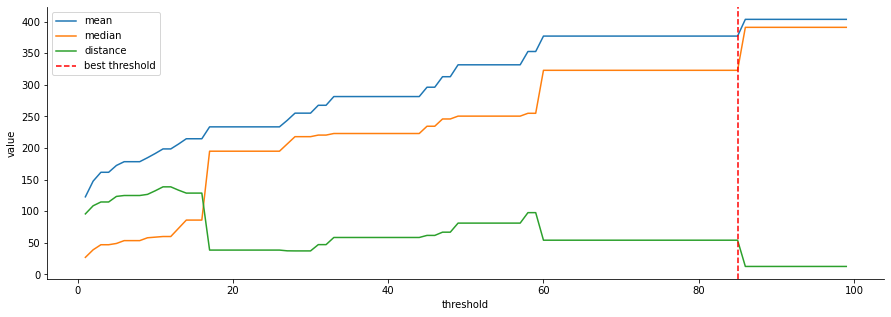

In [5]:
tendency_df, best_threshold = min_central_tendency(count_bylangs, "count", 100)

fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(
    data=tendency_df,
    x="threshold", y="value", hue="metric"
)
plt.axvline(best_threshold, color="r", linestyle="--", label="best threshold")
plt.legend()
plt.ticklabel_format(style="plain", axis="x")
seaborn.despine()


 Puede verse a través de la gráfica para los distintos umbrales cuales son los
 valores de la media y mediana después del filtro, dando como menor distancia
 para el umbral marcado en lineas punteadas. También deja en evidencia que
 aquellos sin remover los lenguajes pocos usados la media y la mediana de los
 conteos resultan ser muy distantes.

In [6]:
best_langs = count_bylangs[count_bylangs["count"] >= best_threshold]
total_count = best_langs["count"].sum()
best_langs = add_cured_col(
    best_langs,
    cured_col="percentage",
    uncured_col="count",
    cure_func=lambda count: count / total_count * 100
)
best_langs.sort_values(by="salary_monthly_NETO_mean", ascending=False)


/home/benjamin/miniconda3/envs/diplodatos-ayvd/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/benjamin/miniconda3/envs/diplodatos-ayvd/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,salary_monthly_NETO_mean,count,percentage
programming_language,,,
go,87904.836744,86,1.900133
python,73735.253069,391,8.638975
java,71864.194432,449,9.920460
bash/shell,71617.798761,218,4.816615
typescript,71477.239137,255,5.634114
javascript,67097.684822,815,18.007070
sql,64449.323541,641,14.162616
css,63720.943986,429,9.478568
html,62947.355986,578,12.770658


 Notar que del total de empleados que utilizan estos 12 lenguajes, el 1.9%
 tienen el mejor salario neto promedio y utilizan **Go** para programar. Luego
 les siguen **Python** con el 8.6% y **Java** con el 9.9%. Notar que en el caso
 de **Javascript** es el más popular con un 18% y un salario no muy alejado de
 los primeros puestos.

 ## Distribución de salario por lenguaje
 Utilizaremos la lista de lenguajes anterior para obtener la distribución de
 salarios por cada uno de ellos para el dataset filtrado por las condiciones
 iniciales.

In [7]:
df_langs = df[df[programming_language].isin(best_langs.index.to_list())]
df_langs


,programming_language,work_contract_type,profile_years_experience,salary_in_usd,salary_monthly_NETO,tools_programming_languages,cured_programming_languages
0,html,Full-Time,5.0,NaN,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
1,javascript,Full-Time,5.0,NaN,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
2,python,Full-Time,5.0,NaN,63000.0,"HTML, Javascript, Python","[html, javascript, python]"
3,java,Full-Time,1.0,NaN,44000.0,"Java, Javascript","[java, javascript]"
4,javascript,Full-Time,1.0,NaN,44000.0,"Java, Javascript","[java, javascript]"
...,...,...,...,...,...,...,...
5069,html,Full-Time,2.0,NaN,53784.0,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...","[c#, css, html, javascript, python, sql, types..."
5070,javascript,Full-Time,2.0,NaN,53784.0,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...","[c#, css, html, javascript, python, sql, types..."
5071,python,Full-Time,2.0,NaN,53784.0,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...","[c#, css, html, javascript, python, sql, types..."
5072,sql,Full-Time,2.0,NaN,53784.0,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...","[c#, css, html, javascript, python, sql, types..."


 Antes de visualizar como distribuyen los salarios nos interesará eliminar los
 outliers para cada lenguaje. Esto se realiza por medio de `clean_outliers`
 removiendo para cada lenguaje, los salarios que estén a una distancia 2.5
 veces su desvio estandar.

In [8]:
df_langs = clean_outliers(
    df_langs,
    by=programming_language,
    column_name=salary_monthly_NETO
)
df_langs[[programming_language, salary_monthly_NETO]] \
    .groupby(programming_language) \
    .describe()


salary_monthly_NETO                                       \
                                   count          mean           std      min   
programming_language                                                            
.net                               221.0  62470.391946  23946.282713  24000.0   
bash/shell                         192.0  71652.677760  26046.953954  29050.0   
c#                                 195.0  61321.599538  23917.349921  29500.0   
css                                375.0  64093.277253  28120.557643  23912.0   
go                                  75.0  88591.292800  25775.618967  35900.0   
html                               512.0  62983.292500  31606.009799  23912.0   
java                               396.0  71367.313106  30272.833661  25000.0   
javascript                         725.0  66997.138110  32198.262614  23912.0   
php                                171.0  61747.725322  30306.457684  23912.0   
python                             341.0  73102.105425  27210.192421  25000.0   
sql                                556.0  64398.883795  26842.881343  24000.0   
typescript                         220.0  71522.240818  32033.941413  25000.0   

                                                             
                           25%      50%       75%       max  
programming_language                                         
.net                  42000.00  59000.0   76000.0  207000.0  
bash/shell            50103.50  68801.0   86626.0  165000.0  
c#                    41250.00  58600.0   75000.0  207000.0  
css                   43000.00  59670.0   77868.0  290000.0  
go                    73120.50  83000.0  106000.0  150000.0  
html                  42323.25  58215.5   75000.0  470000.0  
java                  48375.00  65500.0   89838.0  290000.0  
javascript            45000.00  61000.0   82000.0  470000.0  
php                   40000.00  55000.0   78000.0  290000.0  
python                54000.00  69300.0   89000.0  195000.0  
sql                   44000.00  59769.5   79000.0  290000.0  
typescript            51500.00  67000.0   85000.0  270000.0

 Notar que el 25% de los empleados que utilizan **Go** cobran a lo sumo
 \$73120.50 de salario neto y el 75% \$106000, posicionandose como el lenguaje
 mejor pago, llegando hasta un máximo de \$150000 mensuales! También puede
 verse que en su mayoría el minimo salario está cerca del vital y móvil
 decretado por el país. También los lenguajes **Javascript**, **HTML**, y
 **CSS** otorgan salarios similares, ¿Distribuiran de manera similar? Los
 siguientes boxenplots mustran dicha similitud.

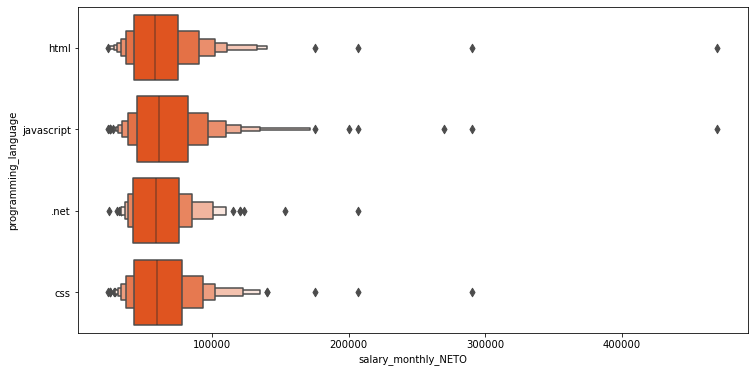

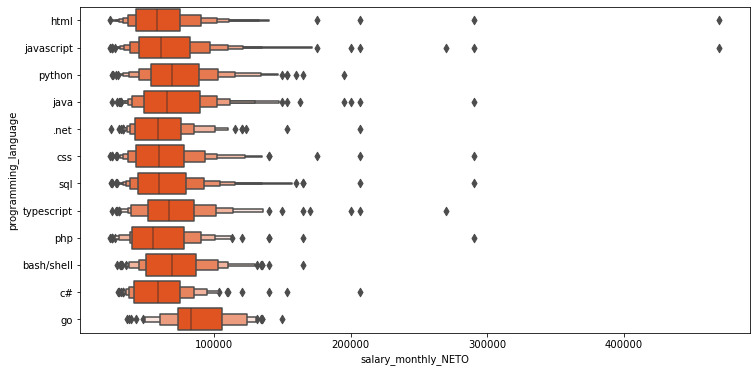

In [9]:
similar_langs = ["html", "javascript", ".net", "css"]
plt.figure(figsize=(12, 6))
seaborn.boxenplot(
    data=df_langs[df_langs[programming_language].isin(similar_langs)],
    x=salary_monthly_NETO, y=programming_language,
    color='orangered'
)
plt.ticklabel_format(style='plain', axis='x')


plt.figure(figsize=(12, 6))
seaborn.boxenplot(
    data=df_langs,
    x=salary_monthly_NETO, y=programming_language,
    color='orangered'
)
plt.ticklabel_format(style='plain', axis='x')



 Notar como el rango intercuartil para cada una de las distribuciones de
 salarios se encuentra por debajo de los \$100000 salvo para **Go** que
 ligeramente lo supera, sin embargo tenemos una asimetría o sesgo hacia los
 valores más chicos de la distribución. Lo cual nos diría que, si bien es el
 lenguaje mayor pago, un poco más del 50% tienen un salario menor que los
 \$100000. A pesar de este sesgo es el único de los 12 que no presenta grandes
 asimetrias en sus colas y cuyos valores extremos no son tan altos. Notar como
 Javascript, HTML, .NET y CSS distribuyen de manera similar. Esto nos daría
 como trabajo a futuro revisar si esto se mantiene para distintos roles de los
 empleados dentro de la compañia. Por último los boxplots dejan en evidencia su
 desventaja al no tener información sobre el primer y el cuarto cuantiles.

 ## Asociación
 Para ver si existe una correlación entre el salario bruto y el neto analizamos
 el coeficiente de correlación de Pearson $\rho$ entre estas variables aleatorias.

In [10]:
salary_cols = [salary_monthly_NETO, salary_monthly_BRUTO]
DB[salary_cols].corr()


,salary_monthly_NETO,salary_monthly_BRUTO
salary_monthly_NETO,1.000000,0.833335
salary_monthly_BRUTO,0.833335,1.000000


 Notar que el valor de $\rho$ entre los salarios nos dá un valor positivo
 cercano a 1. Esto nos indica que existe una correlación entre las variables
 que se comporta aproximadamente lineal pero que aún así podría aún haber una
 fuerte relación no lineal entre ellas. También podemos visualizar la
 distribución conjunta de estas variables por medio un `scatterplot`.

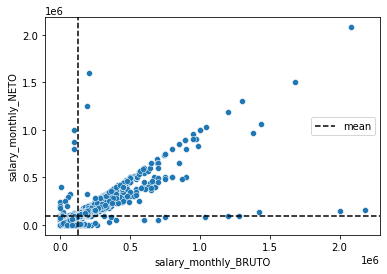

In [11]:
seaborn.scatterplot(data=DB[salary_cols], x=salary_monthly_BRUTO, y=salary_monthly_NETO)
plt.axvline(DB[salary_monthly_BRUTO].mean(), color="black", linestyle="--", label="mean")
plt.axhline(DB[salary_monthly_NETO].mean(), color="black", linestyle="--")
plt.legend()


 Claramente concuerda con el valor del $\rho$, sin embargo también deja en
 evidencia que un valor cerca de 1 no necesariamente implica que al incrementar
 el valor de una variable causa que la otra incremente. Lo único que nos dice
 es que una grán cantidad de sueldos en bruto están asociados con otra numerosa
 cantidad de sueldos en neto. Pero esto no ocurre para valores que están
 realmente alejados de la media de ambas variables. Si bien podrían ser
 considerados outliers, otros más cercanos siguen este comportamiento que
 dejarían en cuestión si realmente puede considerarse eliminar la columna de
 salario bruto.